In [203]:
print("Activating ipynb")
print ("Importing libs")
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import os 
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

Activating ipynb
Importing libs


In [2]:
# Global
years = [x for x in range (2012, 2022)]

In [136]:
# Load Initial Data
print("Loading Initial Game Data")
games_folder_path = "C:/Users/Craig/Documents/Thesis/Thomas_Gallagher_Thesis/Data/AFL_Stats_sorted/Year/Games/"
games_2012 = pd.read_csv(games_folder_path + '2012.csv', index_col=False, parse_dates=['date'])
games_2013 = pd.read_csv(games_folder_path + '2013.csv', index_col=False, parse_dates=['date'])
games_2014 = pd.read_csv(games_folder_path + '2014.csv', index_col=False, parse_dates=['date'])
games_2015 = pd.read_csv(games_folder_path + '2015.csv', index_col=False, parse_dates=['date'])
games_2016 = pd.read_csv(games_folder_path + '2016.csv', index_col=False, parse_dates=['date'])
games_2017 = pd.read_csv(games_folder_path + '2017.csv', index_col=False, parse_dates=['date'])
games_2018 = pd.read_csv(games_folder_path + '2018.csv', index_col=False, parse_dates=['date'])
games_2019 = pd.read_csv(games_folder_path + '2019.csv', index_col=False, parse_dates=['date'])
games_2020 = pd.read_csv(games_folder_path + '2020.csv', index_col=False, parse_dates=['date'])
games_2021 = pd.read_csv(games_folder_path + '2021.csv', index_col=False, parse_dates=['date'])

all_games_path = os.path.join(games_folder_path + "games_sorted.csv")
all_games = pd.read_csv(all_games_path, index_col=False, parse_dates=['date'])

Loading Initial Game Data


C:\Users\Craig\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '24/03/2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Craig\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '29/03/2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Craig\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '30/03/2012' in DD/MM/YYYY format. Provide format or spec

In [32]:
# Load Stats
stats_folder_path = "C:/Users/Craig/Documents/Thesis/Thomas_Gallagher_Thesis/Data/AFL_Stats_sorted/Year/Players/"
stats_2012 = pd.read_csv(stats_folder_path + '2012.csv', index_col=False)
stats_2013 = pd.read_csv(stats_folder_path + '2013.csv', index_col=False)
stats_2014 = pd.read_csv(stats_folder_path + '2014.csv', index_col=False)
stats_2015 = pd.read_csv(stats_folder_path + '2015.csv', index_col=False)
stats_2016 = pd.read_csv(stats_folder_path + '2016.csv', index_col=False)
stats_2017 = pd.read_csv(stats_folder_path + '2017.csv', index_col=False)
stats_2018 = pd.read_csv(stats_folder_path + '2018.csv', index_col=False)
stats_2019 = pd.read_csv(stats_folder_path + '2019.csv', index_col=False)
stats_2020 = pd.read_csv(stats_folder_path + '2020.csv', index_col=False)
stats_2021 = pd.read_csv(stats_folder_path + '2021.csv', index_col=False)

all_stats = "C:/Users/Craig/Documents/Thesis/Thomas_Gallagher_Thesis/Data/AFL_Stats_sorted/Year/Players/stats_sorted.csv"
all_stats_raw = pd.read_csv(all_stats, index_col=False)

C:\Users\Craig\AppData\Local\Temp\ipykernel_16272\431392878.py:15: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  all_stats_raw = pd.read_csv(all_stats, index_col=False)


In [12]:
games_list_year = [games_2012, games_2013, games_2014, games_2015, games_2016, games_2017, games_2018, games_2019, games_2020, games_2021]
stats_list_year = [stats_2012, stats_2013, stats_2014, stats_2015, stats_2016, stats_2017, stats_2018, stats_2019, stats_2020, stats_2021]

## Build Y value 
Result of game based on Home Team (Win = 2, Draw = 1, Lose = 0)

In [137]:
y_true_2012 = games_2012['homeWin']
y_true_2013 = games_2013['homeWin']
y_true_2014 = games_2014['homeWin']
y_true_2015 = games_2015['homeWin']
y_true_2016 = games_2016['homeWin']
y_true_2017 = games_2017['homeWin']
y_true_2018 = games_2018['homeWin']
y_true_2019 = games_2019['homeWin']
y_true_2020 = games_2020['homeWin']
y_true_2021 = games_2021['homeWin']
y_true_all = all_games['homeWin']

## Add Previous Game Result
Set default dict to store results for each team
Only a boolean value, draws only account for ~1% of all games 
Default to false
If the last game was a win set to true
# TODO 
add draws in and see if there is a difference

## Computed Variables
These variables did not appear in the original data set but were added later

Travel Data: Used to determine the impact of travel on teams
             Determined by comparing the venue of the upcoming match to the teams home location

Break: Finds the break between a teams last and next game

Team Changes: The number of players that are different in the from the previous match
              The number of games lost/gained from these changes
              The expected score lost/gained from the incoming players
              Split games out and games in into separate variables

Team Composition: The average/total score of all the selected players
                  Done this way to reduce number of features

TODO   
Previous 5 games result: Totals each teams previous games results

             

## One Hot Encoding
The tree models used for feature engineering cannot take in string inputs
Value encoding can be used to change teams to int values, but then the model will read this as distance i.e. the team with value 1 will be read as being closer to the team with value 2 than the team with value 18. 
One Hot Encoding creates a bool variable for each team which is 1 when the team is playing.

# TODO
See if the model performs better with the simple label encoding. 
One hot encoding creates an issue with decision trees as it creates lots of "empty" splits, there will now be 34 variables which the model will split on 0, which can skew the model.

In [138]:
# One Hot Encoding Teams
encoding = LabelEncoder()
encoding.fit(all_games["homeTeam"].values)

def OHE_Teams(games):
    home_teams = encoding.transform(games["homeTeam"].values)
    away_teams = encoding.transform(games["awayTeam"].values)

    all_teams = np.vstack([home_teams, away_teams]).T
 
    oneHot = OneHotEncoder()
    X_teams = oneHot.fit_transform(all_teams).todense()
    X_teams = pd.DataFrame(X_teams)
    games = pd.concat([games, pd.DataFrame(X_teams)],axis=1)
    return games

games_2012 = OHE_Teams(games_2012)
games_2013 = OHE_Teams(games_2013)
games_2014 = OHE_Teams(games_2014)
games_2015 = OHE_Teams(games_2015)
games_2016 = OHE_Teams(games_2016)
games_2017 = OHE_Teams(games_2017)
games_2018 = OHE_Teams(games_2018)
games_2019 = OHE_Teams(games_2019)
games_2020 = OHE_Teams(games_2020)
games_2021 = OHE_Teams(games_2021)

## One Hot Encoding Venues
Same issues as above, but simplified slightly as there are only 23 stadiums

In [139]:
# One Hot Encoding Venues
encoding = LabelEncoder()
encoding.fit(all_games["venue"].values)
all_venues = all_games["venue"].values
all_venues = all_venues.reshape(-1,1)

def OHE_Venues(games):
    venues = games['venue'].values
    # all_venues = all_venues.reshape(-1,1)
    
    venues = venues.reshape(-1,1)

    oneHot = OneHotEncoder()

    oneHot.fit(all_venues)
    X_venues = oneHot.transform(venues).toarray()
    X_venues = pd.DataFrame(X_venues, columns=oneHot.categories_[0])
    games = pd.concat([games, X_venues], axis=1)
    return games

games_2012 = OHE_Venues(games_2012)
games_2013 = OHE_Venues(games_2013)
games_2014 = OHE_Venues(games_2014)
games_2015 = OHE_Venues(games_2015)
games_2016 = OHE_Venues(games_2016)
games_2017 = OHE_Venues(games_2017)
games_2018 = OHE_Venues(games_2018)
games_2019 = OHE_Venues(games_2019)
games_2020 = OHE_Venues(games_2020)
games_2021 = OHE_Venues(games_2021)

In [142]:
def show_dtypes(df):
    for index in range(len(df.dtypes)):
        print(f'{df.columns[index]} -> {df.dtypes[index]}' )

In [180]:
# Remove Variables

X_2012 = games_2012.drop(['gameId', 'venue', 'homeTeam', 'homeWin','awayTeam', 
'year','date','startTime', 'attendance', 'homeTeamScore', 'awayTeamScore'],axis=1)


In [181]:
# print(X_2012.dtypes)
def bool_to_int(row):
    if str(row['homeTeamLastWin']) == "True":
        row['homeTeamLastWin'] = 1
    else:
        row['homeTeamLastWin'] = 0
    if str(row['awayTeamLastWin']) == "True":
        row['awayTeamLastWin'] = 1
    else:
        row['awayTeamLastWin'] = 0
    return row
X_2012 = X_2012.apply(bool_to_int, axis = 1)
print(X_2012.dtypes)
    

round                  int64
rainfall             float64
homeTeamLastWin        int64
awayTeamLastWin        int64
awayTravel             int64
                      ...   
Subiaco              float64
Sydney Showground    float64
Traeger Park         float64
Wellington           float64
York Park            float64
Length: 77, dtype: object


In [153]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

clf = DecisionTreeClassifier(random_state=26)
scores = clf.fit(X_2012, y_true_2012)
# scores = cross_val_score(clf, X_2012, y_true_2012)
print(scores)
# print("F1: {0:0.4f}".format(np.mean(scores)))

DecisionTreeClassifier(random_state=26)


C:\Users\Craig\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [218]:
# Exploratory classifier on the original training set
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
m = RandomForestClassifier(n_estimators=10, n_jobs=-1)
m.fit(X_2012, y_true_2012)
m.score(X_2012, y_true_2012)

# m.score(X_train_orig, y_train_orig)

0.9758454106280193

In [205]:
x_train_2012 = X_2012[:171]
y_train_2012 = y_true_2012[:171]
x_valid_2012 = X_2012[171:]
y_valid_2012 = y_true_2012[171:]


In [268]:
def print_score(m, train, valid, test=None):
    # if test == None:
        print([m.score(train, y_train_2012), m.score(valid, y_valid_2012)])
        plot_confusion_matrix(m, train, y_train_2012)
        plot_confusion_matrix(m, valid, y_valid_2012)
    # else:
    #     print(m.score(X_test, y_test))
    #     plot_confusion_matrix(m, X_test, y_test)

[1.0, 0.6111111111111112]


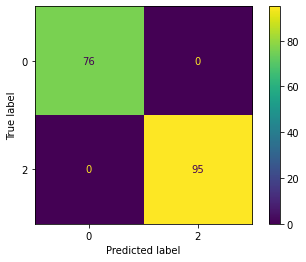

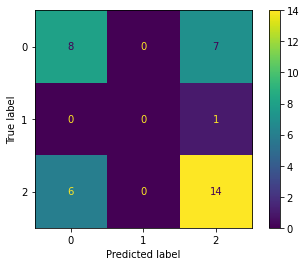

In [219]:
model_1 = RandomForestClassifier(n_estimators=100, n_jobs=-1)
model_1.fit(x_train_2012, y_train_2012)
print_score(model_1, x_train_2012, x_valid_2012)

Fitting 4 folds for each of 100 candidates, totalling 400 fits
[0.7660818713450293, 0.6111111111111112]


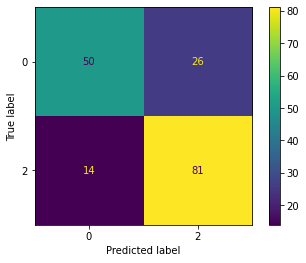

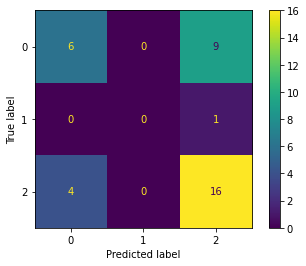

In [220]:
from sklearn.model_selection import RandomizedSearchCV
grid={
    'criterion':        ['entropy','gini'],
    'min_samples_split':[3, 5, 7, 9, 10],
    'min_samples_leaf': [8, 9, 10, 11, 12],
    'max_features':     [0.5, "sqrt", "log2", 0.8],
    'n_estimators':     [10, 20, 40],
}

model_2 = RandomizedSearchCV(estimator=RandomForestClassifier(),
                       param_distributions=grid,
                       n_iter=100,
                       cv=4,
                       verbose=1,
                       n_jobs=-1,
                       random_state=42)

model_2.fit(x_train_2012, y_train_2012)
print_score(model_2, x_train_2012, x_valid_2012)

CPU times: total: 141 ms
Wall time: 126 ms
[0.7660818713450293, 0.5555555555555556]


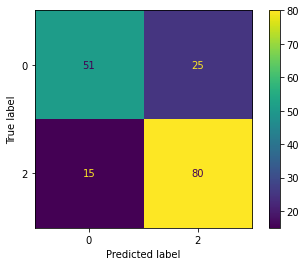

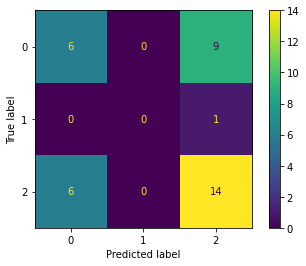

In [208]:
model_2.best_estimator_
bag_model = model_2.best_estimator_
%time bag_model.fit(x_train_2012, y_train_2012)
# print(bag_model)
print_score(bag_model, x_train_2012, x_valid_2012)


In [277]:
from sklearn import metrics
import matplotlib.pyplot as plt
preds = np.stack([tree.predict(x_valid_2012) for tree in bag_model.estimators_])
preds.shape

plt.plot([metrics.auc(y_valid_2012, np.mean(preds[:i+1], axis=0)) for i in range(20)])

ValueError: x is neither increasing nor decreasing : [2 0 0 2 2 0 0 0 2 2 2 0 0 2 2 2 0 0 2 2 2 0 2 0 0 1 2 2 0 0 2 2 2 2 2 0].

In [278]:
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt


roc_auc_score(y_true_2012, preds, multi_class="ovr")


ValueError: Target scores need to be probabilities for multiclass roc_auc, i.e. they should sum up to 1.0 over classes

In [235]:
from treeinterpreter import treeinterpreter as ti

In [236]:
row = x_valid_2012.values[None,0]
row

array([[  21.        ,    4.        ,    0.        ,    1.        ,
           0.        ,    1.        ,    5.        ,    3.        ,
        -654.        , -122.        ,  -31.05780303,  -12.30631313,
          70.54545455,   78.79545455,   76.75340909,   74.60189394,
          77.03858717,   74.92258953,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           1.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    1.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.     

In [232]:
# fastai
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

<AxesSubplot: xlabel='cols'>

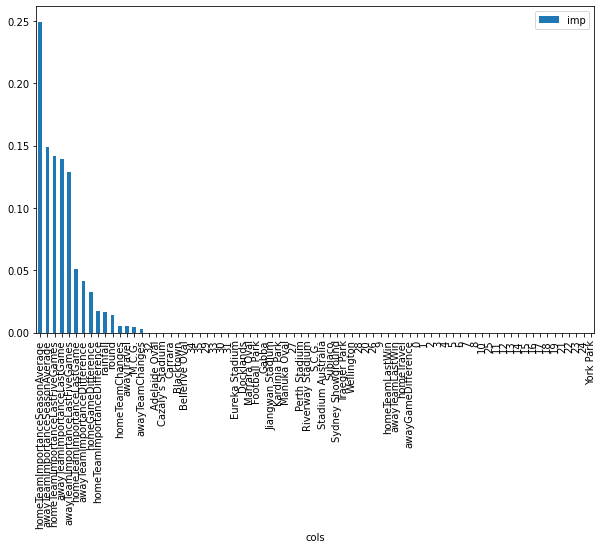

In [237]:
fi = rf_feat_importance(bag_model , x_train_2012)
fi.plot('cols', 'imp', 'bar', figsize=(10,6))

In [275]:
fi[:15]

,cols,imp
16,homeTeamImportanceSeasonAverage,0.249332
17,awayTeamImportanceSeasonAverage,0.148865
14,homeTeamImportanceLastFiveGames,0.141792
13,awayTeamImportanceLastGame,0.139611
15,awayTeamImportanceLastFiveGames,0.128556
12,homeTeamImportanceLastGame,0.050749
11,awayTeamImportanceDifference,0.041677
8,homeGameDifference,0.032314
10,homeTeamImportanceDifference,0.017549
1,rainfall,0.016405


In [264]:
f = fi[:15].cols
cut_train_2012 = x_train_2012[f]
cut_valid_2012 = x_valid_2012[f]

CPU times: total: 46.9 ms
Wall time: 37 ms
[0.7543859649122807, 0.5277777777777778]


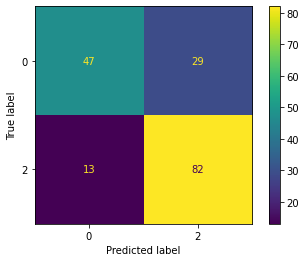

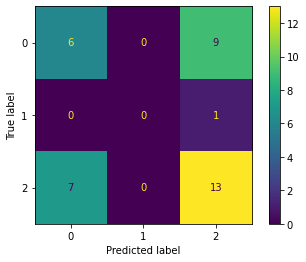

In [269]:
model_3 = model_2.best_estimator_
%time model_3.fit(cut_train_2012, y_train_2012)
print_score(model_3, cut_train_2012, cut_valid_2012)

<AxesSubplot: xlabel='cols'>

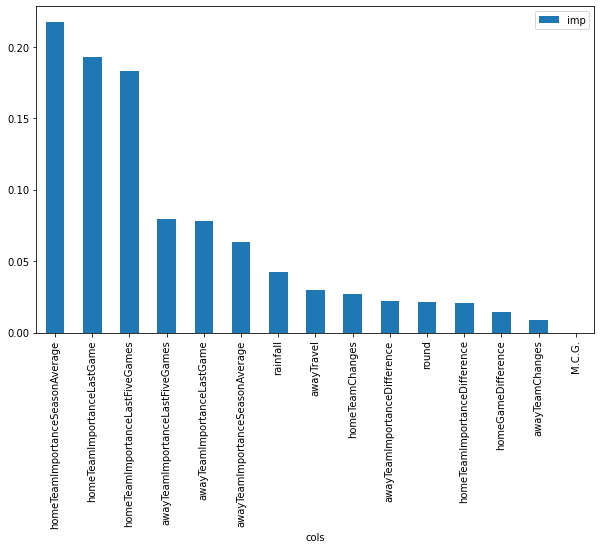

In [270]:
fi2 = rf_feat_importance(model_3 , cut_train_2012)
fi2.plot('cols', 'imp', 'bar', figsize=(10,6))

In [273]:
fi2, fi[:15]

(                               cols       imp
 0   homeTeamImportanceSeasonAverage  0.217392
 5        homeTeamImportanceLastGame  0.192673
 2   homeTeamImportanceLastFiveGames  0.183161
 4   awayTeamImportanceLastFiveGames  0.079573
 3        awayTeamImportanceLastGame  0.078027
 1   awayTeamImportanceSeasonAverage  0.063340
 9                          rainfall  0.042061
 12                       awayTravel  0.029928
 11                  homeTeamChanges  0.026768
 6      awayTeamImportanceDifference  0.022361
 10                            round  0.021075
 8      homeTeamImportanceDifference  0.020518
 7                homeGameDifference  0.014190
 14                  awayTeamChanges  0.008933
 13                           M.C.G.  0.000000,
                                cols       imp
 16  homeTeamImportanceSeasonAverage  0.249332
 17  awayTeamImportanceSeasonAverage  0.148865
 14  homeTeamImportanceLastFiveGames  0.141792
 13       awayTeamImportanceLastGame  0.139611
 15  awayTea

In [239]:
prediction, bias, contributions = ti.predict(m, row)
prediction[0][0], bias[0][0]

(0.09999999999999999, 0.4420289855072464)

In [240]:
contributions

array([[[-2.06721140e-02,  0.00000000e+00,  2.06721140e-02],
        [ 3.14857825e-03,  1.43673172e-04, -3.29225142e-03],
        [-2.50000000e-02,  0.00000000e+00,  2.50000000e-02],
        [ 9.85252988e-03, -4.83091787e-04, -9.36943809e-03],
        [-1.02007470e-02,  0.00000000e+00,  1.02007470e-02],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 1.79219378e-02, -1.94174757e-03, -1.59801903e-02],
        [ 7.72347131e-03,  3.89488913e-04, -8.11296022e-03],
        [ 2.40086384e-02, -2.27272727e-03, -2.17359111e-02],
        [-5.12266569e-03,  1.27425566e-03,  3.84841003e-03],
        [-5.73416972e-02,  6.29185326e-04,  5.67125119e-02],
        [-2.31609503e-02,  0.00000000e+00,  2.31609503e-02],
        [-6.61863085e-02, -1.61122254e-03,  6.77975311e-02],
        [ 4.20972895e-02,  1.28374805e-04, -4.22256644e-02],
        [-7.03868449e-02,  1.06418109e-03,  6.93226638e-02],
        [-6.37841823e-02, -1.28205128e-03,  6.50662336e-02],
        [-2.88293640e-02

In [241]:
idxs = np.argsort(contributions[0][:,0])
idxs

array([17, 14, 12, 15, 10, 59, 16,  2, 11,  0,  4, 45, 35, 28, 37,  9, 33,
       20, 61, 32, 19, 38, 30, 31, 22, 50, 51, 52, 54, 55, 56, 57, 58, 60,
       62, 64, 21, 65, 66, 67, 68, 69, 70, 71, 73, 74, 63, 48, 49, 46, 23,
       24, 25, 26, 18, 34, 47, 75, 36, 76,  5, 40, 41, 44, 39, 53,  1, 27,
       43,  7, 29,  3, 42,  6,  8, 13, 72], dtype=int64)

In [243]:
pd.DataFrame( [o for o in zip(x_valid_2012.columns[idxs], x_valid_2012.iloc[0][idxs], contributions[0][:,0][idxs])] )

KeyError: '[59, 45, 37, 61, 38, 50, 51, 52, 54, 55, 56, 57, 58, 60, 62, 64, 65, 66, 67, 68, 69, 70, 71, 73, 74, 63, 48, 49, 46, 47, 75, 36, 76, 40, 41, 44, 39, 53, 43, 42, 72] not in index'